In [442]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.api import add_constant
from datetime import datetime
from scipy.stats import f
%matplotlib notebook

In [357]:
def graph_residuals(model):
    for ix, resid in enumerate(model.resid):
        plt.plot([ix, ix], [0, resid], color="orange")
        plt.scatter(ix, resid, color="orange")

    plt.hlines(0, -1, 15.2, alpha=.5, linestyles="dashed")
    plt.xlim(-0.5, 15.2)
    plt.title(r"Residuals between $Y$ and $\bar Y$")
    plt.show()

****
## Exercise 7.16
Table 7.6 gives quarterly data on these variables:

* $Y$: Quantity of roses sold, dozens
* $X_2$: Average wholesale price of roses (\$/dozen)
* $X_3$: Average wholesale price of carnations (\$/dozen)
* $X_4$: Average weekly family disposible income (\$/dozen)
* $X_5$: The trend variable taking values in $\mathbb{N}$ for the period 1971-II to 1975-II in the Detroid metropolitan area

$$
Y_t = \alpha_1 + \alpha_2 X_{2t} + \alpha_3 X_{3t} + \alpha_4 X_{4t} + \alpha_5 X_{5t} + \varepsilon_t
$$

$$
\ln Y_t = \beta_1 + \beta_2 \ln X_{2t} + \beta_3 \ln X_{3t} + \beta_4 \ln X_{4t} + \beta_5 \ln X_{5t} + \varepsilon_t
$$


- a. Estimate the parameters of the linear model and interpret the results.


- b. Estimate the parameters of the log–linear model and interpret the results.


- c. $\beta_2$ , $\beta_3$ , and $\beta_4$ give, respectively, the own-price, cross-price, and income elastici-ties of demand. What are their a priori signs? Do the results concur with the a priori expectations?


- d. How would you compute the own-price, cross-price, and income elasticities for the linear model?


- e. On the basis of your analysis, which model, if either, would you choose and why?

#### a) Fitting the linear model

In [3]:
roses = pd.read_csv("roses.csv")
roses.head()

,Y,X2,X3,X4,X5
0,11484,2.26,3.49,158.11,1
1,9348,2.54,2.85,173.36,2
2,8429,3.07,4.06,165.26,3
3,10079,2.91,3.64,172.92,4
4,9240,2.73,3.21,178.46,5


In [4]:
roses_lmod = smf.ols("Y ~ X2 + X3 + X4 + X5", data=roses).fit()
roses_lmod.summary2()

/Users/gerardo/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.775     
Dependent Variable: Y                AIC:                269.4803  
Date:               2017-04-13 16:43 BIC:                273.3432  
No. Observations:   16               Log-Likelihood:     -129.74   
Df Model:           4                F-statistic:        13.89     
Df Residuals:       11               Prob (F-statistic): 0.000281  
R-squared:          0.835            Scale:              9.4066e+05
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept 10816.0433 5988.3484  1.8062 0.0983 -2364.2228 23996.3093
X2        -2227.7044  920.4657 -2.4202 0.0340 -4253.6357  -201.7730
X3         1251.1412 1157.0206  1.0813 0.3027 -1295.4441  3797.7265
X4            6.2830   30.6217  0.2052 0.8412   -61.1148    73.6808
X5         -197.3999  101.5612 -1.9437 0.0780  -420.9347    26.1348
-------------------------------------------------------------------
Omnibus:                1.968        Durbin-Watson:           2.334
Prob(Omnibus):          0.374        Jarque-Bera (JB):        1.094
Skew:                   0.639        Prob(JB):                0.579
Kurtosis:               2.904        Condition No.:           4482 
===================================================================
* The condition number is large (4e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

Considering $\alpha = 0.05$. We see that this model is better than having an *intercept-only model*, since the F-statistic is significant at this $\alpha$-level.

On the other hand, the model fails to assert the significance of the intercept and the variables $X_4$ and $X_5$.

<IPython.core.display.Javascript object>


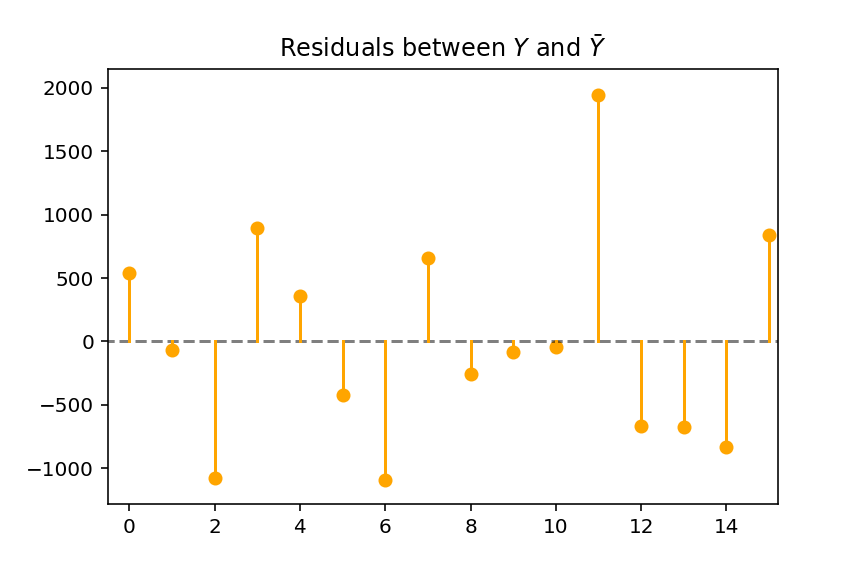

In [360]:
graph_residuals(roses_lmod)

#### b) Fitting the log-model

In [6]:
roses_logmod = smf.ols("""np.log(Y) ~
                       np.log(X2) + np.log(X3) +
                       np.log(X4) + X5""",
                       data=roses).fit()
roses_logmod.summary2()

/Users/gerardo/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.726   
Dependent Variable: np.log(Y)        AIC:                -9.0821 
Date:               2017-04-13 16:43 BIC:                -5.2191 
No. Observations:   16               Log-Likelihood:     9.5410  
Df Model:           4                F-statistic:        10.92   
Df Residuals:       11               Prob (F-statistic): 0.000798
R-squared:          0.799            Scale:              0.025840
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      3.5722    4.6952   0.7608  0.4628  -6.7618  13.9061
np.log(X2)    -1.1707    0.4883  -2.3974  0.0354  -2.2455  -0.0959
np.log(X3)     0.7379    0.6529   1.1303  0.2824  -0.6990   2.1749
np.log(X4)     1.1532    0.9020   1.2785  0.2274  -0.8321   3.1385
X5            -0.0301    0.0164  -1.8339  0.0938  -0.0662   0.0060
-----------------------------------------------------------------
Omnibus:              1.619        Durbin-Watson:           2.049
Prob(Omnibus):        0.445        Jarque-Bera (JB):        0.324
Skew:                 0.248        Prob(JB):                0.851
Kurtosis:             3.490        Condition No.:           1297 
=================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

The *log-lin* model appears to be significant, as it has a large F-statistic. On the other hand, looking at every coefficient in the model, we see that there appears to be 3 non-significant variables at $\alpha = 0.05$.

Also, this model appears to have a lower $R^2$ than the linear model.

<IPython.core.display.Javascript object>


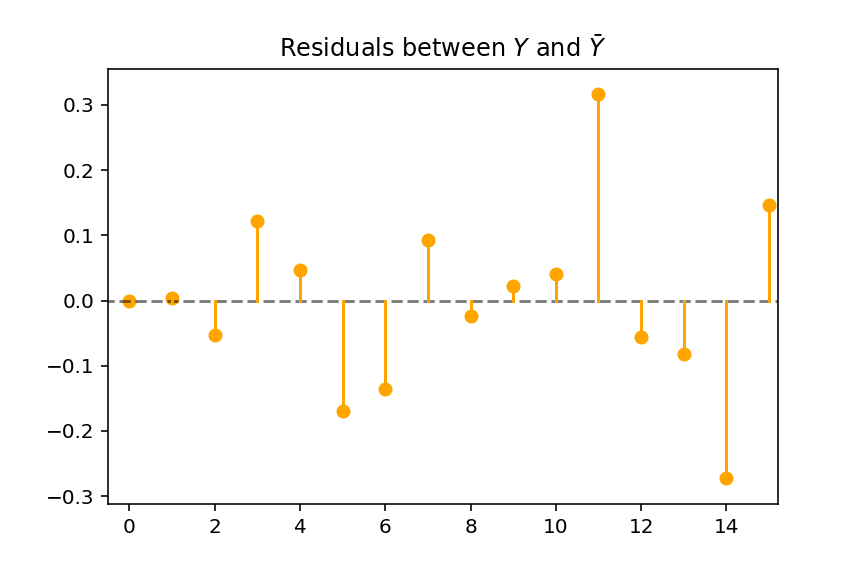

In [361]:
graph_residuals(roses_logmod)

#### c) Interpreting the Parameters

In [8]:
roses_logmod.params

Intercept     3.572156
np.log(X2)   -1.170728
np.log(X3)    0.737938
np.log(X4)    1.153213
X5           -0.030111
dtype: float64

The values for $\beta_2$ and $\beta_3$ do concur with the *a priori* expectations. This is due the fact that, for a small positive change in the price of the roses and the income of families, we would expect that the quantity of roses sold decreases in the former case and increases in the latter.

Furthermore, the value of $\beta_4$ does not match the *a priori* expectations. A small average increase in the whilesale price of roses would not imply, under the *a priori* expectation, an increase in the quantity of roses sold.

#### d) Linear model computations
We could compute $\beta_2$ by changing X2 one percent and see how $Y$ reacts. The same for rationale could be applied to $\beta_3$

#### e) Choosing a model

I would choose neither. Given the existence of non-significant variables, and a possible superfluous variable $X_5$. The best alternative is to decide which variables do give useful information

****
## Exercise 7.17

Wildcats are wells drilled to ﬁnd and produce oil and/or gas in an improved area or to ﬁnd a new reservoir in a ﬁeld previously found to be productive of oil or gas or to extend the limit of a known oil or gas reservoir.

- $Y$: The number of wildcats drilled
- $X_2$: Price at the wellhead in the previous period
- $X_3$: domestic output
- $X_4$: GNP constant dollars
- $X_5$: Trend variable

See if the following model fitst the data:

$$
    Y_t = \beta_1 + \beta_2X_{2_t} + \beta_3\ln X_{3t} + \beta_4X_{4t} + \beta_5X_{5t} + \varepsilon_t
$$

* **a.** Can you offer an a priori rationale to this model?

* **b.** Assuming the model is acceptable, estimate the parameters of the model and their standard errors, and obtain $R^2$ and $\bar R^2$.

* **c.** Comment on your results in view of your prior expectations.

* **d.** What other speciﬁcation would you suggest to explain wildcat activity?  Why?

In [9]:
wildcat = pd.read_csv("wildcat.csv")
wildcat.head()

,Y,X2,X3,X4,X5
0,8.01,4.89,5.52,487.67,0
1,9.06,4.83,5.05,490.59,1
2,10.31,4.68,5.41,533.55,2
3,11.76,4.42,6.16,576.57,3
4,12.43,4.36,6.26,598.62,4


#### a) Rationale

The rationale of this model is to explain the number of wildcats drilled based on the price of previous wellheads, the percentual change of the domestic output, the GNP and some trend variable to allocate time.

#### b) Obtaining $R^2$ and $\bar R^2$

<IPython.core.display.Javascript object>


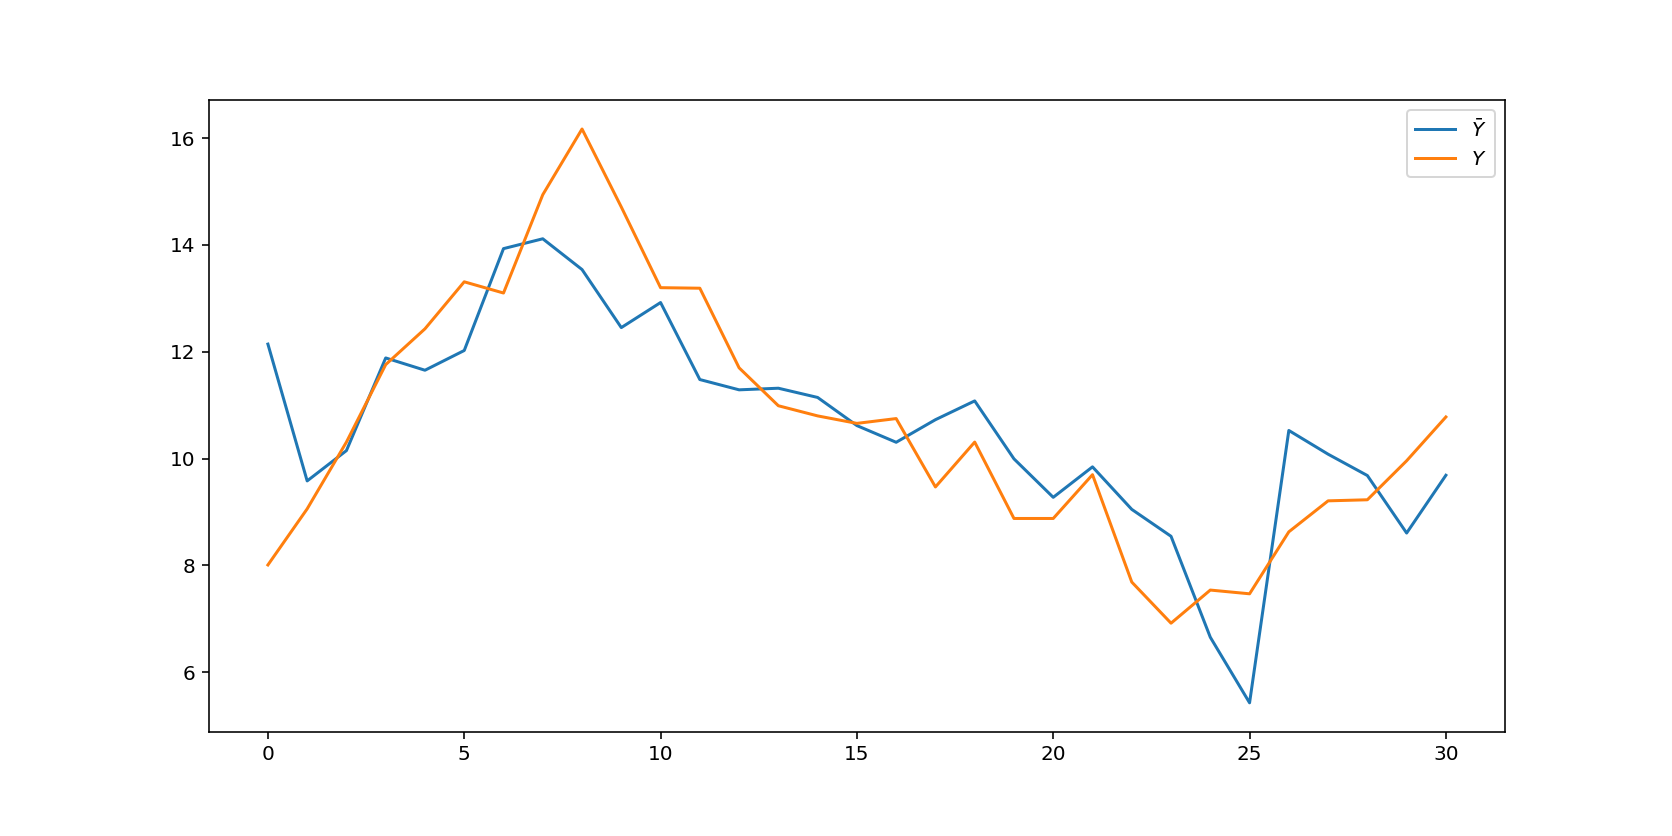

In [354]:
wcat_model  = smf.ols("Y ~ X2 + np.log(X3) + X4 + X5",
                      data=wildcat).fit()

plt.plot(wcat_model.fittedvalues, label=r"$\bar Y$")
plt.plot(wildcat.Y, label="$Y$")
plt.legend()
plt.show()

In [19]:
print("R^2: {}".format(round(wcat_model.rsquared,4)))
print("Adj. R^2: {}".format(round(wcat_model.rsquared_adj, 4)))

R^2: 0.6559
Adj. R^2: 0.603


#### c) Summary

The model seems to explain over half of the variation in the observed data. Further analysis would help us determine whether there are variables missing or variables currently in the model that we do not need.

#### d) Model Adjustment

I would consider the demand of gas and oil as an extra variable to determine the number of wilcats drilled.

****
## Exercise 7.24

Table 7.12 gives data for real consumption expenditure, real income, real wealth, and real interest rates for the U.S. for the years 1947–2000.

- a. Given the data in the table, estimate the linear consumption function using income, wealth, and interest rate. What is the ﬁtted equation?

- b. What do the estimated coefﬁcients indicate about the variables’ relationships to consumption expenditure?

#### a) Estimating the model

In [30]:
econ = pd.read_table("./table_712.txt", sep="\t", usecols=range(5))
econ.head()

,ear,C,Yd,wealth,interest
0,1947,976.4,1035.2,5166.8,-10.351
1,1948,998.1,1090.0,5280.8,-4.720
2,1949,1025.3,1095.6,5607.4,1.044
3,1950,1090.9,1192.7,5759.5,0.407
4,1951,1107.1,1227.0,6086.1,-5.283


In [58]:
econ_model = smf.ols("C ~ Yd + wealth + interest",
                    data = econ).fit()

econ_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-20.6333,12.827,-1.609,0.114,-46.397,5.130
Yd,0.7340,0.014,53.376,0.000,0.706,0.762
wealth,0.0360,0.002,14.488,0.000,0.031,0.041
interest,-5.5211,2.307,-2.394,0.020,-10.154,-0.888


#### b) Explaining the coeficients

The coefficients in the model express the following:
- **Yd**: The for each 1 billion extra dollars available as disposable income, the total consumption grows about 0.70 billions
- **wealth**: As total wealth increases, it does not  account for a great impact in consumption
- **Interest**: Each percent rise in interest rates affects the total consumption vastly.

****
## Exercise 7.25

*Estimating Qualcomm stock prices*. As an example of the polynomial regression, consider data on the weekly stock prices of Qualcomm, Inc., a digital wireless telecommunications designer and manufacturer over the time period of 1995 to 2000. The full data can be found on the textbook’s website in Table 7.13. During the late 1990, technological stocks were particularly proﬁtable, but what type of regression model will best ﬁt these data? Figure 7.4 shows a basic plot of the data for those years. 

This plot does seem to resemble an elongated S curve; there seems to be a slight increase in the average stock price, but then the rate increases dramatically toward the far right side of the graph. As the demand for more specialized phones dramatically increased and the technology boom got under way, the stock price followed suit and increased at a much faster rate.

- **a**. Estimate a linear model to predict the closing stock price based on time. Does this model seem to ﬁt the data well?

- **b**. Now estimate a squared model by using both time and time-squared. Is this a better ﬁt than in (a)?

- **c**. Finally, ﬁt the following cubic or third-degree polynomial:

$$
    Y_i = \beta_0 + \beta_1X_i + \beta_2X_i^2 + \beta_3X_i^3 + \varepsilon_i
$$

where $Y$ is the stock price and $X$ represents time. Which model seems to be the best estimator for the stock prices?

In [177]:
qualcomm = pd.read_table("qualcomm.txt", sep="\t")
qualcomm["date"] = [datetime.strptime(date, "%m/%d/%Y") for date in qualcomm.ate]
del qualcomm["ate"]

qualcomm.head()

,time,Close,date
0,1,23.47,1995-01-03
1,2,20.54,1995-01-09
2,3,22.74,1995-01-16
3,4,27.88,1995-01-23
4,5,27.39,1995-01-30


In [192]:
qcom_linear_model = smf.ols("Close ~ time", data=qualcomm).fit()
qcom_2nd_model = smf.ols("Close ~ time + I(time**2)", data=qualcomm).fit()
qcom_3rd_model = smf.ols("Close ~ time + I(time**2) + I(time**3)", data=qualcomm).fit()

qcom_models = [qcom_linear_model,
          qcom_2nd_model,
          qcom_3rd_model]

<IPython.core.display.Javascript object>


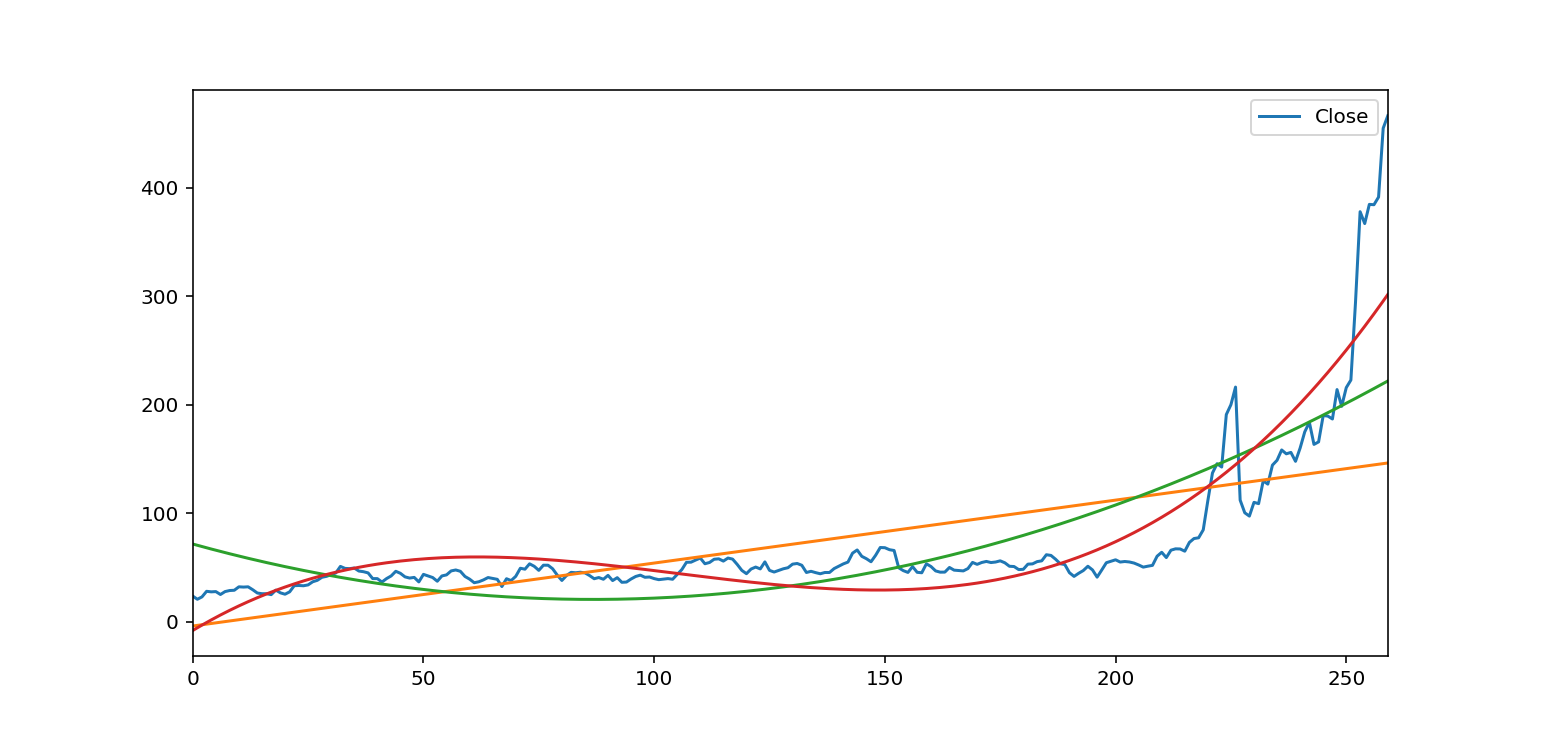

In [353]:
qualcomm[["date", "Close"]].plot()
qcom_linear_model.fittedvalues.plot()
qcom_2nd_model.fittedvalues.plot()
qcom_3rd_model.fittedvalues.plot()
plt.show()

In [143]:
print("linear model")
qcom_linear_model.summary().tables[1]

linear model


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-4.6941,6.881,-0.682,0.496,-18.244,8.856
time,0.5805,0.046,12.701,0.000,0.491,0.671


In [145]:
print("2nd Degree Polynomial")
qcom_2nd_model.summary().tables[1]

2nd Degree Polynomial


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,72.6825,8.147,8.921,0.000,56.639,88.726
time,-1.1915,0.144,-8.266,0.000,-1.475,-0.908
I(time ** 2),0.0068,0.001,12.694,0.000,0.006,0.008


In [146]:
print("3rd Degree Polynomial")
qcom_3rd_model.summary().tables[1]

3rd Degree Polynomial


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-10.8543,7.670,-1.415,0.158,-25.959,4.250
time,2.6128,0.254,10.286,0.000,2.113,3.113
I(time ** 2),-0.0296,0.002,-13.094,0.000,-0.034,-0.025
I(time ** 3),9.29e-05,5.69e-06,16.326,0.000,8.17e-05,0.000


#### 4) Choosing the best model

In [253]:
for model in qcom_models:
    print("{: >40} | R2_adj = {}".format(model.model.formula, model.rsquared_adj))

                            Close ~ time | R2_adj = 0.38230849211923457
               Close ~ time + I(time**2) | R2_adj = 0.6188645887565991
  Close ~ time + I(time**2) + I(time**3) | R2_adj = 0.8125417956906624


Given the three models. The model that explains the most variation is the cubic model. 

****
## Exercise 8.36
According to the National Bureau of Economic Research, the most recent U.S. business contraction cycle ended in late 2001. Split the data into three sections:

**(1)** 1970–1981, **(2)** 1982–2001, and **(3)** 2002–2005.

- **a**. Estimate both the model for the full dataset (years 1970–2005) and the third section (post-2002). Using the Chow test, determine if there is a signiﬁcant break between the third period and the full dataset.

- **b**. With this new data in Table 8.11, determine if there is still a signiﬁcant difference between the ﬁrst set of years (1970–1981) and the full dataset, now that there are more observations available.

- **c**. Perform the Chow test on the middle period (1982–2001) versus the full dataset to see if the data in this period behave signiﬁcantly differently than the rest of the data.

Recall the chow test:
$$
    F = \frac{(RSS_{R} - RSS_{UR})\ /\ k}{RSS_{UR} \ / \ (n_1 + n_2 - 2k)} \sim F_{[k,(n +n −2k)]}
$$

With
$$
    H_0: RSS_{R} = RSS_{UR} \ \ \& \ \ H_1: RSS_{R} \neq RSS_{UR}
$$

In [321]:
cycle = pd.read_table("table8_11.txt",
                      usecols=range(3), thousands=",")
cycle.head()

,ear,Savings,Income
0,1970,69.5,735.7
1,1971,80.6,801.8
2,1972,77.2,869.1
3,1973,102.7,978.3
4,1974,113.6,1071.6


In [304]:
def sections(X):
    if X.ear <= 1981:
        return "blue"
    elif 1982 <= X.ear <= 2001:
        return "red"
    else:
        return "green"

cycle["section"] = cycle.apply(sections, 1)

<IPython.core.display.Javascript object>


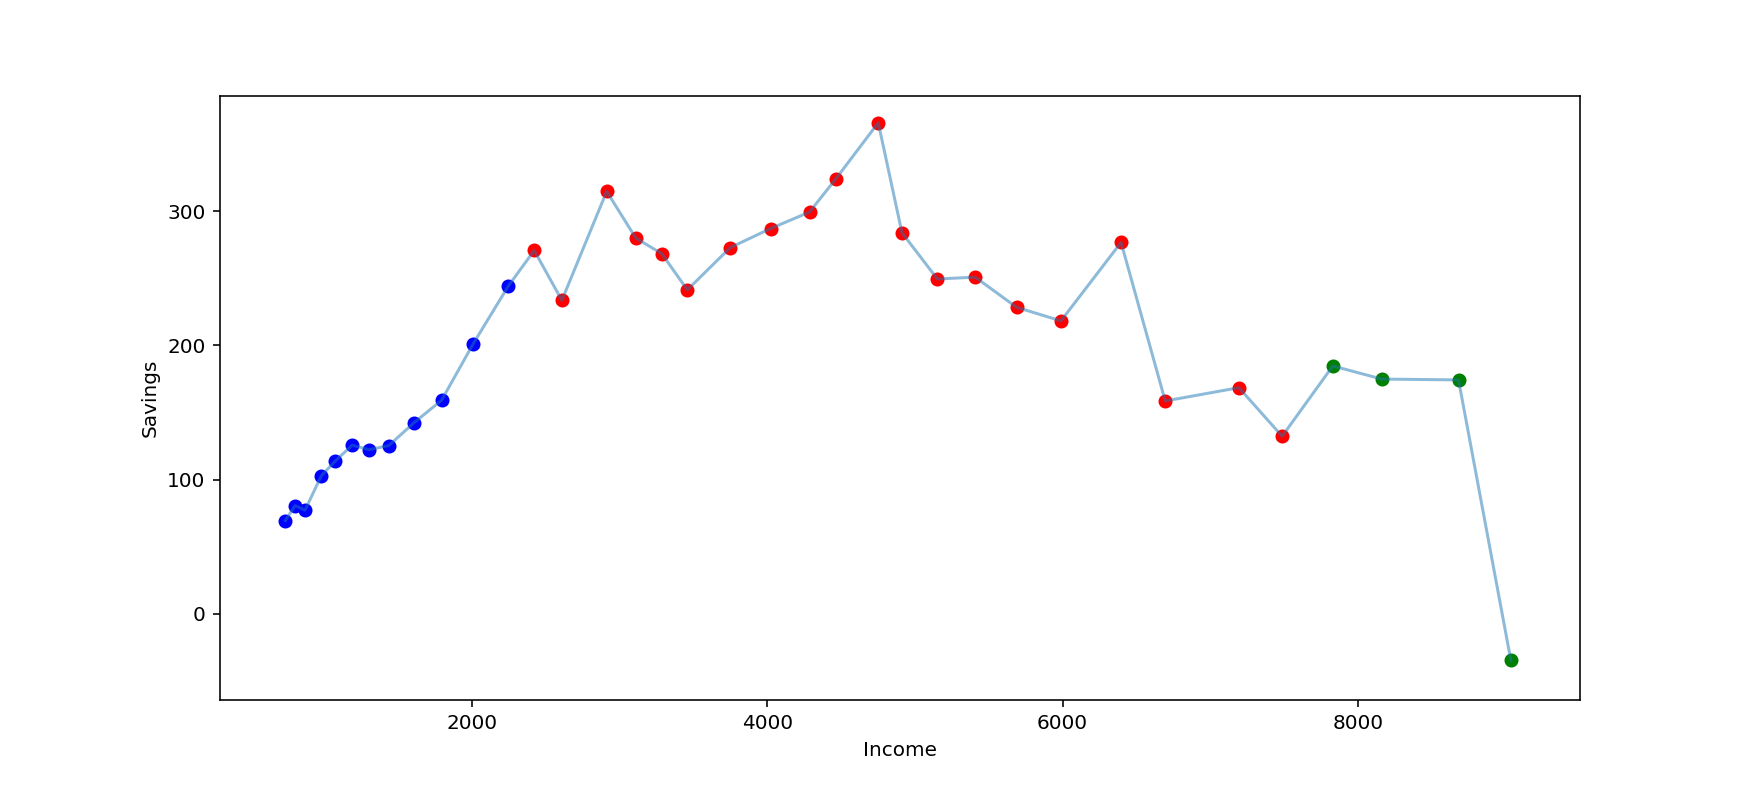

In [384]:
for yval in cycle.values:
    plt.scatter(yval[2], yval[1], color=yval[3])
plt.xlabel("Income")
plt.ylabel("Savings")
plt.plot(cycle.Income, cycle.Savings, alpha=0.5);

In [483]:
full_cycle = smf.ols("Savings ~ Income", data=cycle).fit()
RSS_R= sum(full_cycle.resid**2)

#### a) Structural change 2002-2005

In [469]:
cycle3_map = [True if y >= 2002 else False for y in cycle.ear]
cycle3_true = smf.ols("Savings ~ Income",
                      data=cycle[cycle3_map]).fit()

cycle3_false = smf.ols("Savings ~ Income",
                       data=cycle[[not x for x in cycle3_map]]).fit()

In [470]:
RSS_UR = sum(cycle3_true.resid**2) + sum(cycle3_false.resid**2)

Fstat = ((RSS_R - RSS_UR) / 2) / (RSS_UR /  (len(cycle) - 2))
Fstat

8.5051598416533416

In [468]:
Fstat > f.isf(0.05, 2, len(cycle)-2)

True

Letting $\alpha = 0.05$, as $F$ > $F_{[2, 34]}$, we reject the null hypothesis. There was a structural change between the years 2002-2005 for this dataset.

#### b) Structural change 1970-1981

In [482]:
cycle1_map = [True if 1971 <= y <= 1981
              else False for y in cycle.ear]

cycle1_true = smf.ols("Savings ~ Income",
                     data=cycle[cycle1_map]).fit()

cycle1_false = smf.ols("Savings ~ Income",
                      data=cycle[[not y for y in cycle1_map]]).fit()

In [486]:
RSS_UR = sum(cycle1_true.resid ** 2) + sum(cycle1_false.resid ** 2)

Fstat = ((RSS_R - RSS_UR) / 2) / (RSS_UR / (len(cycle) - 2))
Fstat

14.468186485340143

In [492]:
Fstat > f.isf(0.05, 2, len(cycle) - 2)

True

Letting $\alpha = 0.05$, as $F$ > $F_{[2, 34]}$, we reject the null hypothesis. There was a structural change between the years 1970-1981 for this dataset.

#### b) Structural change 1982–2001

this is a C++ written test.
I have no fear whatsoever in learning a new language. In fact, I believe it is better (to achive my goal) t

In [493]:
cycle2_map =  [True if 1982 <= y <= 2001 else False
              for y in cycle.ear]

cycle2_true = smf.ols("Savings ~ Income",
                     data=cycle[cycle2_map]).fit()

cycle2_false = smf.ols("Savings ~ Income",
                      data=cycle[[not y for y in cycle2_map]]).fit()

In [495]:
RSS_UR = sum(cycle2_true.resid**2) + sum(cycle2_false.resid**2)

Fstat = ((RSS_R - RSS_UR) / 2) / (RSS_UR / (len(cycle) - 2))
Fstat

27.172676604038852

In [496]:
Fstat > f.isf(0.05, 2, len(cycle) - 2)

True

Letting $\alpha = 0.05$, as $F$ > $F_{[2, 34]}$, we reject the null hypothesis. There was a structural change between the years 1982-2001 for this dataset.

****
## Exercise 10.27
Table 10.13 gives data on imports, GDP, and the Consumer Price Index (CPI) for the United States over the period 1975–2005. You are asked to consider the following model:

$\ln\text{Imports}_t = \beta_1 + \beta_2 \ln\text{GDP}_t + \beta_3 \ln\text{CPI}_t + \varepsilon_t$

1. Estimate the parameters of this model using the data given in the table.

2. Do you suspect that there is multicollinearity in the data?

3. Regress: 
    1. $\ln\text{Imports}_t = A_1 + A_2 \ln\text{GDP}_t$

    2. $\ln\text{Imports}_t = B_1 + B_2 \ln\text{CPI}_t$

    3. $\ln\text{GDP}_t = C_1 + C_2 \ln\text{CPI}_t$
    
    On the basis of these regressions, what can you say about the nature of multicollinearity in the data?

4. Suppose there is multicollinearity in the data but β 2 and β 3 are individually signiﬁcant at the 5 percent level and the overall F test is also signiﬁcant. In this case should we worry about the collinearity problem?

In [503]:
import_cpi = pd.read_table("./import_cpi.txt", thousands=",")
import_cpi.head()

,Year,CPI,GDP,Imports
0,1975,53.8,1638.3,98185
1,1976,56.9,1825.3,124228
2,1977,60.6,2030.9,151907
3,1978,65.2,2294.7,176002
4,1979,72.6,2563.3,212007


In [508]:
import_model = smf.ols("np.log(Imports) ~ np.log(GDP) + np.log(CPI)",
                      data=import_cpi).fit()
import_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(Imports)   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1737.
Date:                Fri, 14 Apr 2017   Prob (F-statistic):           4.36e-30
Time:                        09:41:46   Log-Likelihood:                 39.793
No. Observations:                  31   AIC:                            -73.59
Df Residuals:                      28   BIC:                            -69.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4094      0.270      5.219      0.000       0.856       1.963
np.log(GDP)     1.8501      0.183     10.115      0.000       1.475       2.225
np.log(CPI)    -0.8734      0.285     -3.067      0.005      -1.457      -0.290
==============================================================================
Omnibus:                        4.927   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.289
Skew:                           0.684   Prob(JB):                        0.193
Kurtosis:                       3.823   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


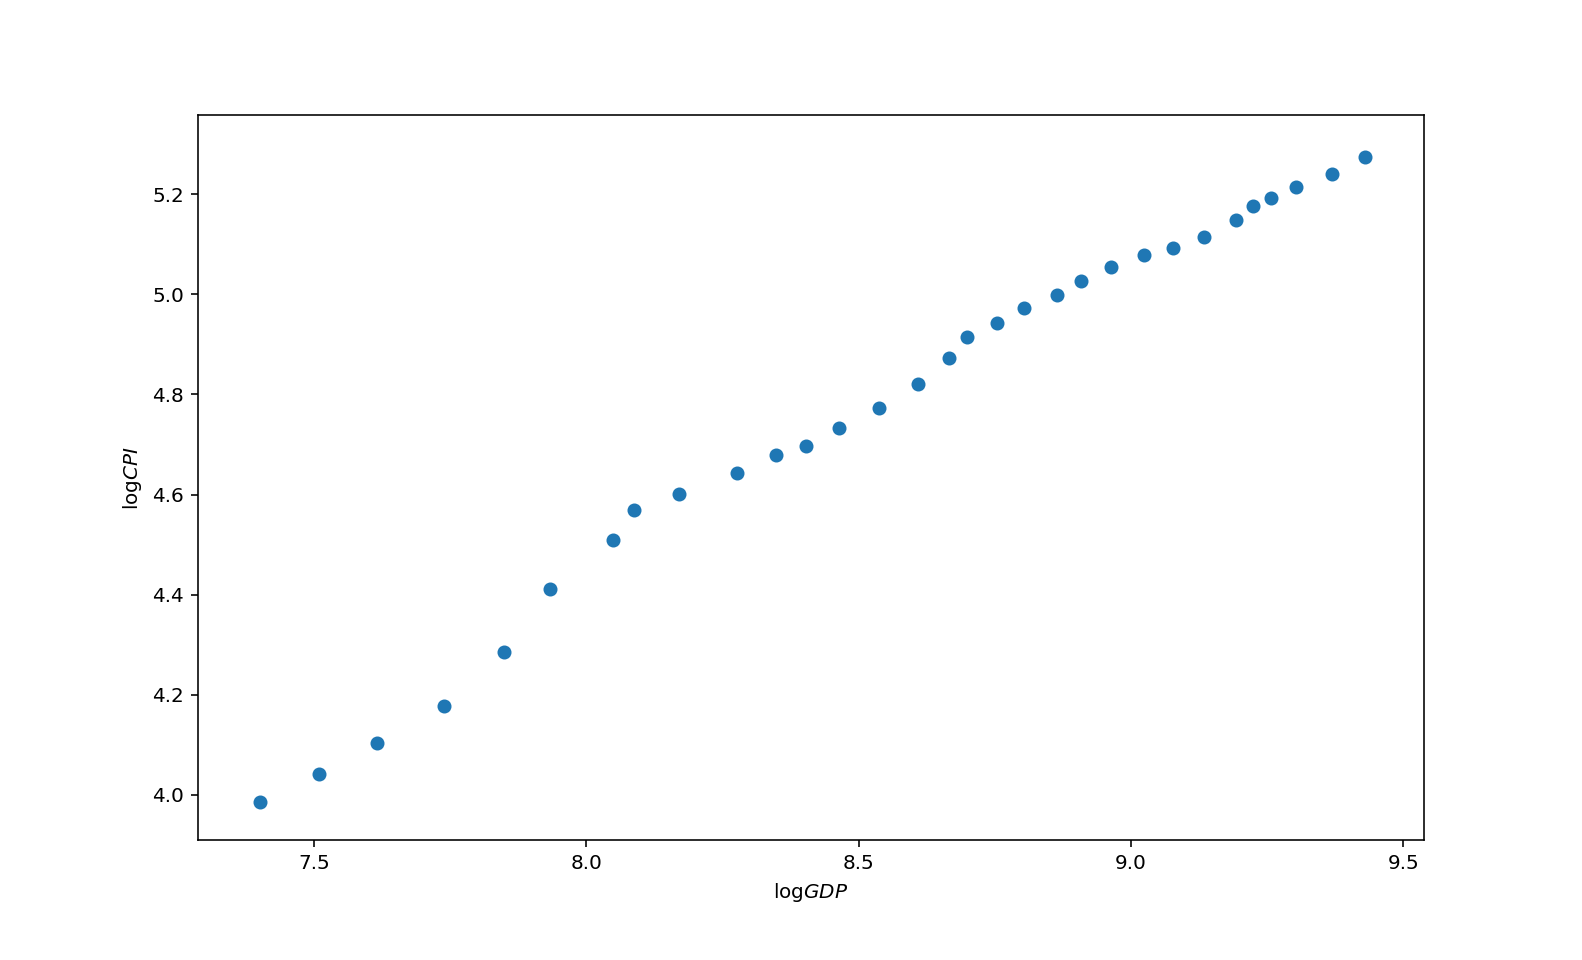

In [523]:
plt.scatter(np.log(import_cpi.GDP), np.log(import_cpi.CPI))
plt.xlabel(r"$\log{GDP}$")
plt.ylabel(r"$\log{CPI}$")

In [524]:
np.log(import_cpi[["GDP", "CPI"]]).corr()

,GDP,CPI
GDP,1.00000,0.99276
CPI,0.99276,1.00000


The fitted model has a high $R^2$ and every $\beta_i$ coefficient seems to be statistically significant, which is not an indication of multicollinearity. Still, plotting $\log\text{GDP}$ and $\log\text{CPI}$ side by side denotes a highly linear correlation. Furthermore, the correlation matrix for each variable denotes a high correlation among the variables.

Therefore, there exists a possibility of multicollinearity in the data.

#### Fitting the models

In [529]:
modelA = smf.ols("np.log(Imports) ~ np.log(GDP)",
                data=import_cpi).fit()
modelA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(Imports)   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2686.
Date:                Fri, 14 Apr 2017   Prob (F-statistic):           3.83e-30
Time:                        11:07:00   Log-Likelihood:                 35.305
No. Observations:                  31   AIC:                            -66.61
Df Residuals:                      29   BIC:                            -63.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0019      0.214      9.341      0.000       1.564       2.440
np.log(GDP)     1.2933      0.025     51.831      0.000       1.242       1.344
==============================================================================
Omnibus:                        0.650   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.744
Skew:                           0.254   Prob(JB):                        0.689
Kurtosis:                       2.437   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [530]:
modelB = smf.ols("np.log(Imports) ~ np.log(CPI)",
                data=import_cpi).fit()
modelB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(Imports)   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     750.5
Date:                Fri, 14 Apr 2017   Prob (F-statistic):           2.81e-22
Time:                        11:07:19   Log-Likelihood:                 15.959
No. Observations:                  31   AIC:                            -27.92
Df Residuals:                      29   BIC:                            -25.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.5783      0.348     10.281      0.000       2.866       4.290
np.log(CPI)     1.9865      0.073     27.394      0.000       1.838       2.135
==============================================================================
Omnibus:                        2.895   Durbin-Watson:                   0.280
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                1.397
Skew:                           0.096   Prob(JB):                        0.497
Kurtosis:                       1.978   Cond. No.                         64.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [530]:
modelB = smf.ols("np.log(Imports) ~ np.log(CPI)",
                data=import_cpi).fit()
modelB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(Imports)   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     750.5
Date:                Fri, 14 Apr 2017   Prob (F-statistic):           2.81e-22
Time:                        11:07:19   Log-Likelihood:                 15.959
No. Observations:                  31   AIC:                            -27.92
Df Residuals:                      29   BIC:                            -25.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.5783      0.348     10.281      0.000       2.866       4.290
np.log(CPI)     1.9865      0.073     27.394      0.000       1.838       2.135
==============================================================================
Omnibus:                        2.895   Durbin-Watson:                   0.280
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                1.397
Skew:                           0.096   Prob(JB):                        0.497
Kurtosis:                       1.978   Cond. No.                         64.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [531]:
modelB = smf.ols("np.log(GDP) ~ np.log(CPI)",
                data=import_cpi).fit()
modelB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GDP)   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1981.
Date:                Fri, 14 Apr 2017   Prob (F-statistic):           3.01e-28
Time:                        11:07:45   Log-Likelihood:                 38.781
No. Observations:                  31   AIC:                            -73.56
Df Residuals:                      29   BIC:                            -70.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1723      0.167      7.033      0.000       0.831       1.513
np.log(CPI)     1.5458      0.035     44.509      0.000       1.475       1.617
==============================================================================
Omnibus:                        2.654   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                1.329
Skew:                          -0.076   Prob(JB):                        0.515
Kurtosis:                       1.997   Cond. No.                         64.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can say there exists multicollinearity in the data. The values are highly correlated and GDP can be express as CPI

****
## Exercise 10.31

Table 10.16 gives data on the crime rate in 47 states in the United States for 1960. Try to develop a suitable model to explain the crime rate in relation to the 14 socioeconomic variables given in the table. Pay particular attention to the collinearity problem in developing your model.

In [552]:
crime = pd.read_csv("table10_16.csv")
crime_form = " + ".join(crime.columns).replace("R +", "R ~")
crime_model = smf.ols(crime_form, data=crime).fit()

In [548]:
crime.head()

,R,Age,S,Ed,Ex0,Ex1,LF,M,N,NW,U1,U2,W,X
0,79.1,151,1,91,58,56,510,950,33,301,108,41,394,261
1,163.5,143,0,113,103,95,583,1012,13,102,96,36,557,194
2,57.8,142,1,89,45,44,533,969,18,219,94,33,318,250
3,196.9,136,0,121,149,141,577,994,157,80,102,39,673,167
4,123.4,141,0,121,109,101,591,985,18,30,91,20,578,174


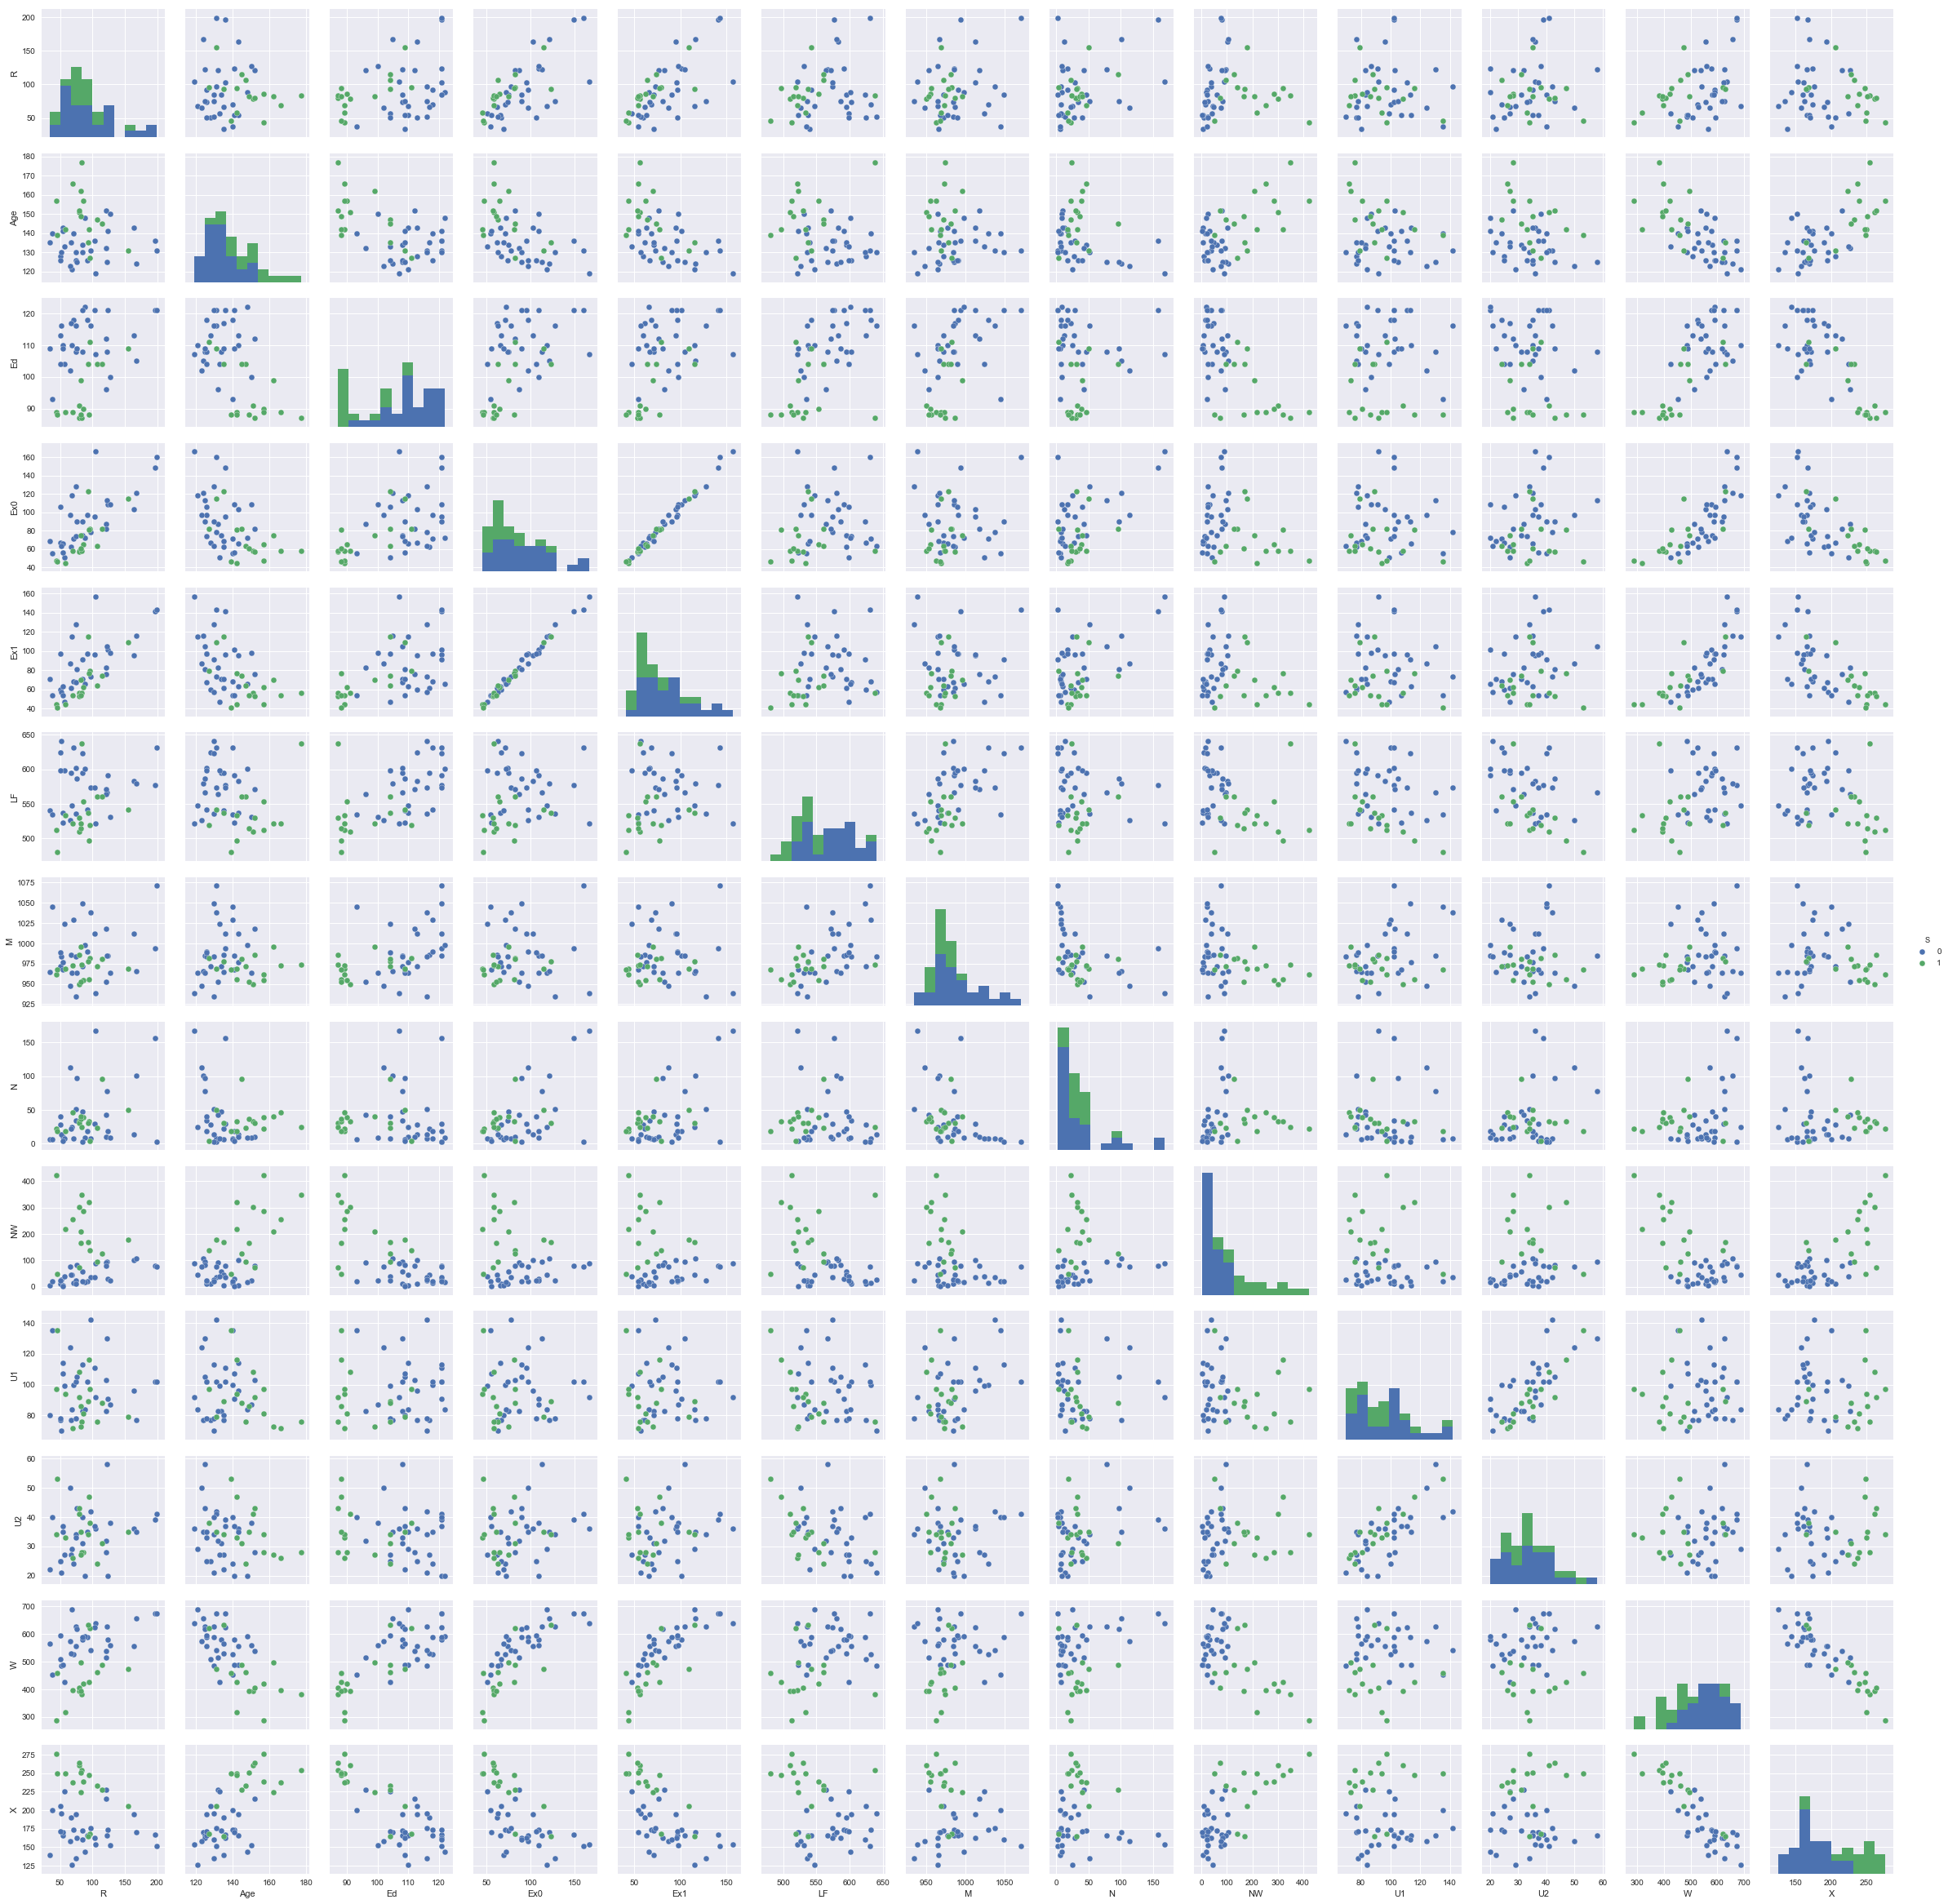

In [550]:
%matplotlib inline
import seaborn as sns
sns.pairplot(crime, hue="S", vars=crime.columns.drop("S"))

In [553]:
crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     8.462
Date:                Fri, 14 Apr 2017   Prob (F-statistic):           3.69e-07
Time:                        12:27:47   Log-Likelihood:                -203.52
No. Observations:                  47   AIC:                             435.0
Df Residuals:                      33   BIC:                             460.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -691.8376    155.888     -4.438      0.000   -1008.994    -374.681
Age            1.0398      0.423      2.460      0.019       0.180       1.900
S             -8.3083     14.912     -0.557      0.581     -38.646      22.030
Ed             1.8016      0.650      2.773      0.009       0.480       3.123
Ex0            1.6078      1.059      1.519      0.138      -0.546       3.762
Ex1           -0.6673      1.149     -0.581      0.565      -3.004       1.670
LF            -0.0410      0.153     -0.267      0.791      -0.353       0.271
M              0.1648      0.210      0.785      0.438      -0.262       0.592
N             -0.0413      0.130     -0.319      0.752      -0.305       0.222
NW             0.0072      0.064      0.112      0.911      -0.123       0.137
U1            -0.6017      0.437     -1.376      0.178      -1.491       0.288
U2             1.7923      0.856      2.093      0.044       0.050       3.534
W              0.1374      0.106      1.298      0.203      -0.078       0.353
X              0.7929      0.235      3.373      0.002       0.315       1.271
==============================================================================
Omnibus:                        0.343   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.260
Skew:                           0.172   Prob(JB):                        0.878
Kurtosis:                       2.882   Cond. No.                     6.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>


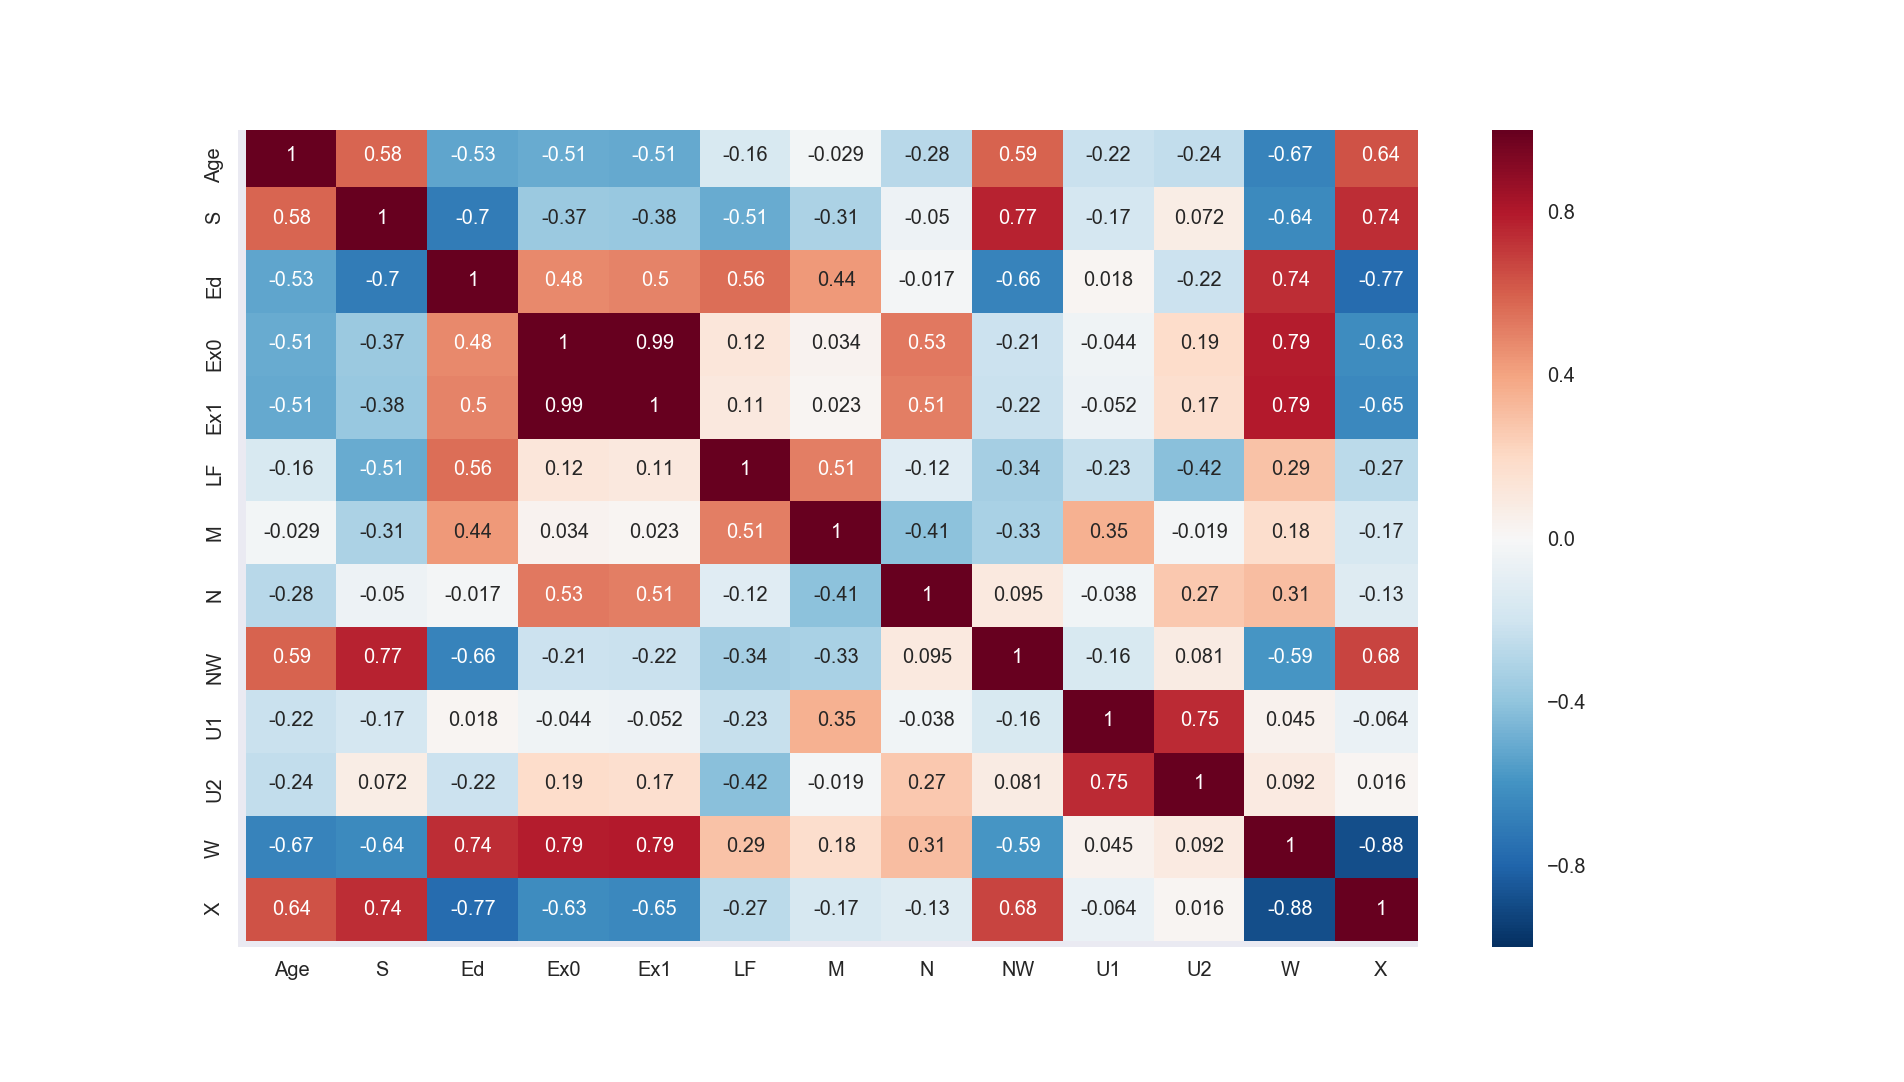

In [564]:
%matplotlib notebook
sns.heatmap(crime.drop("R",1).corr(), annot=True)

In [600]:
smf.ols("R ~ Ex0 + X",
        data=crime).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     30.42
Date:                Fri, 14 Apr 2017   Prob (F-statistic):           5.06e-09
Time:                        13:10:22   Log-Likelihood:                -217.58
No. Observations:                  47   AIC:                             441.2
Df Residuals:                      44   BIC:                             446.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -94.4662     34.395     -2.747      0.009    -163.784     -25.148
Ex0            1.2415      0.164      7.582      0.000       0.911       1.571
X              0.4095      0.122      3.357      0.002       0.164       0.655
==============================================================================
Omnibus:                        3.125   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.140
Skew:                          -0.485   Prob(JB):                        0.343
Kurtosis:                       3.392   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

****
## Exercise 11.15
Table 11.7 gives data on 81 cars about MPG (average miles per gallons), HP (en-gine horsepower), VOL (cubic feet of cab space), SP (top speed, miles per hour), and WT (vehicle weight in 100 lbs.).

- a. Consider the following model:
$$
    \text{MPG}_i = \beta_1 + \beta_2\text{SP}_i + \beta_3\text{HP}_i + \beta_4\text{WT}_i + \varepsilon_i
$$

    Estimate the parameters of this model and interpret the results. Do they make economic sense?
    

- b. Would you expect the error variance in the preceding model to be heteroscedastic? Why?

- c. Use the White test to ﬁnd out if the error variance is heteroscedastic.

- d. Obtain White’s heteroscedasticity-consistent standard errors and t values and compare your results with those obtained from OLS.

- e. If heteroscedasticity is established, how would you transform the data so that in the transformed data the error variance is homoscedastic? Show the necessary calculations.

White's model:
1. Regress the model and find $\varepsilon_i \ \forall\ i$ 
2. Run the auiliary Regression and find $R^2$
3. $n\cdot R^2 \sim \chi^2_{df}$
4. $H_0: \exists\text{ heterocedasticity}$

In [615]:
cars = pd.read_table("./tables/car_mileage.txt")
cars.head()

,HP,MPG,MPGF,VOL,WT,SP
0,49,65.4,53.700681,89,17.5,96
1,55,56.0,50.013401,92,20.0,97
2,55,55.9,50.013401,92,20.0,97
3,70,49.0,45.696322,92,20.0,105
4,53,46.5,50.504232,92,20.0,96


In [625]:
cars_model = smf.ols("MPG ~ SP + HP + WT", data=cars).fit()
cars_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,189.9597,22.529,8.432,0.000,145.099,234.820
SP,-1.2717,0.233,-5.455,0.000,-1.736,-0.808
HP,0.3904,0.076,5.121,0.000,0.239,0.542
WT,-1.9033,0.186,-10.259,0.000,-2.273,-1.534


The model makes economic sense; the variables that explain a car's MPG are both significant and logical, due my prior on a car's efficiency.

****
## Exercise 11.16

Food expenditure in India. In Table 2.8 we have given data on expenditure on food and total expenditure for 55 families in India.

- a. Regress expenditure on food on total expenditure, and examine the residuals obtained from this regression.

- b. Plot the residuals obtained in (a) against total expenditure and see if you observe any systematic pattern.

- c. If the plot in (b) suggests that there is heteroscedasticity, apply the Park, Glejser, and White tests to ﬁnd out if the impression of heteroscedasticity observed in (b) is supported by these tests.

- d. Obtain White’s heteroscedasticity-consistent standard errors and compare those with the OLS standard errors. Decide if it is worth correcting for heteroscedas-ticity in this example.

****
## Exercise 11.17

Repeat Exercise 11.16, but this time regress the logarithm of expenditure on food on the logarithm of total expenditure. If you observe heteroscedasticity in the linear model of Exercise 11.16 but not in the log–linear model, what conclusion do you draw? Show all the necessary calculations.